Importing libraries into Python Environment is successful
Dataset loaded successfully.
First 5 rows of the dataset:
   Gender  Age  Salary  Purchase Iphone
0    Male   19   19000                0
1    Male   35   20000                0
2  Female   26   43000                0
3  Female   27   57000                0
4    Male   19   76000                0
Last 5 rows of the dataset:
     Gender  Age  Salary  Purchase Iphone
395  Female   46   41000                1
396    Male   51   23000                1
397  Female   50   20000                1
398    Male   36   33000                0
399  Female   49   36000                1
Dataset Shape: (400, 4)
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 


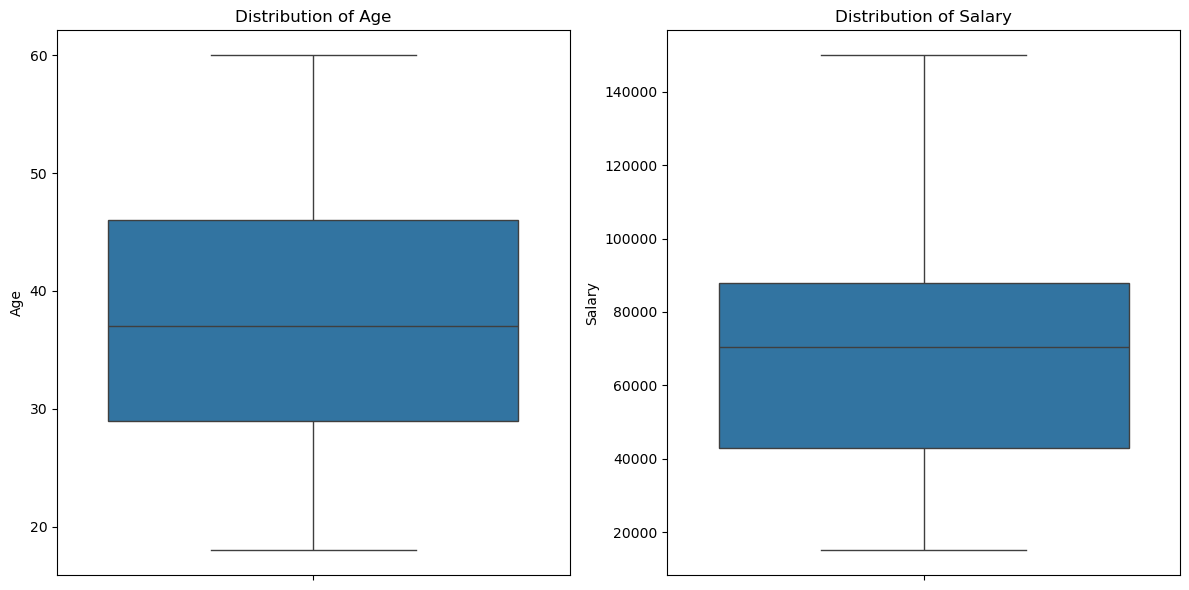

Descriptive Statistics:
              Age         Salary  Purchase Iphone
count  380.000000     380.000000       380.000000
mean    37.586842   70421.052632         0.368421
std     10.592492   34604.155483         0.483012
min     18.000000   15000.000000         0.000000
25%     29.000000   43000.000000         0.000000
50%     37.000000   70500.000000         0.000000
75%     46.000000   88000.000000         1.000000
max     60.000000  150000.000000         1.000000


<Figure size 800x600 with 0 Axes>

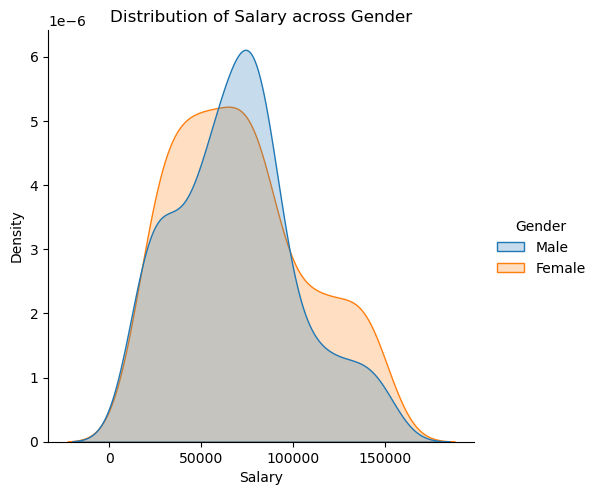

<Figure size 800x600 with 0 Axes>

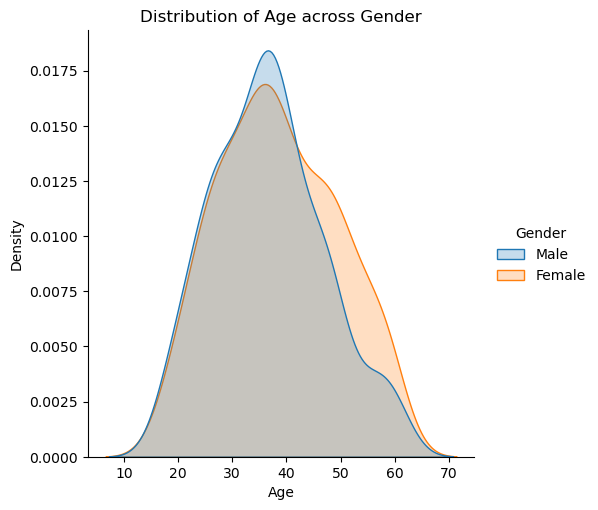

C:\Users\Admin\AppData\Local\Temp\ipykernel_338612\2032757147.py:78: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(data=data, x='Gender', y='Purchase Iphone', errwidth=0)


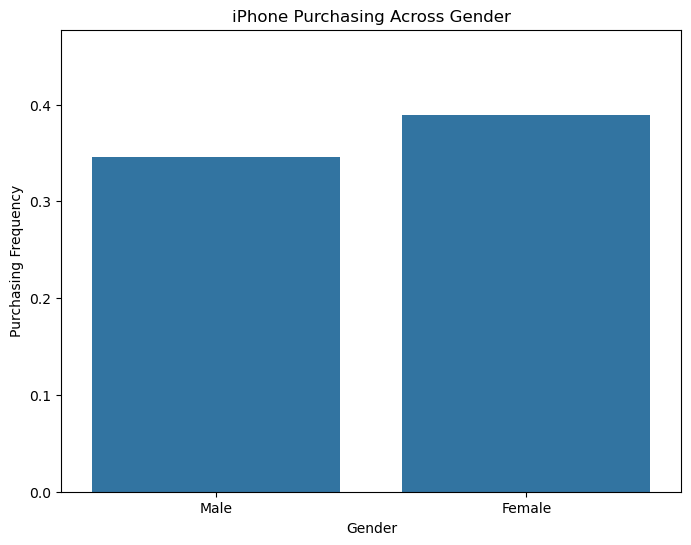

Features and Target Variable:
   Gender  Age  Salary
0       0   19   19000
1       0   35   20000
2       1   26   43000
3       1   27   57000
4       0   19   76000
Training set shape: (304, 3)
Testing set shape: (76, 3)
Accuracy of the model: 88.16%
**************Classification Report********************
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        54
           1       0.71      1.00      0.83        22

    accuracy                           0.88        76
   macro avg       0.85      0.92      0.87        76
weighted avg       0.92      0.88      0.89        76



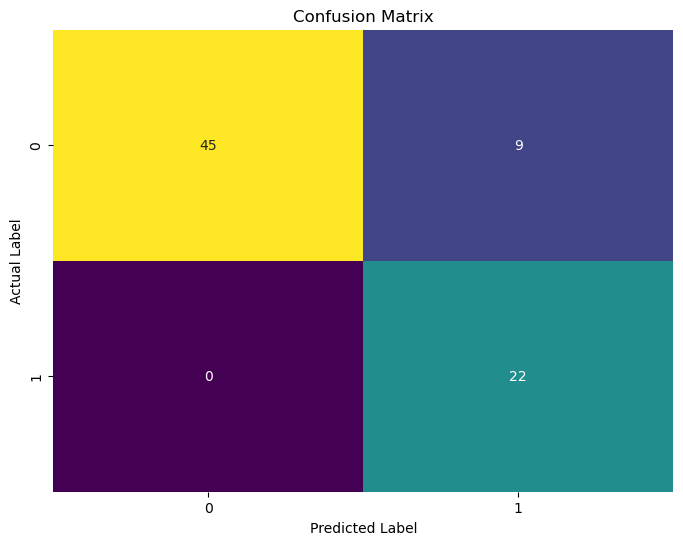

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import time

print("Importing libraries into Python Environment is successful")

# Loading the Dataset
data = pd.read_csv("G:/TOP-MENTOR/FILES/Sep 1st/Assignments/Decision Tree  Project8/iphone_purchase_records.csv")
print("Dataset loaded successfully.")
print("First 5 rows of the dataset:")
print(data.head())

# Displaying the last 5 rows of the dataset
print("Last 5 rows of the dataset:")
print(data.tail())

# Preliminary Data Exploration
print("Dataset Shape:", data.shape)
print("Data Info:")
print(data.info())

# Checking for Missing Values
print("Null values in each column:")
print(data.isnull().sum())

# Checking and Removing Duplicate Values
print("Number of duplicate rows:", data.duplicated().sum())
data = data.drop_duplicates()
print("Number of duplicate rows after removal:", data.duplicated().sum())

# Outlier Detection Using Box Plots
plt.figure(figsize=(12, 6))

# Box plot for Age
plt.subplot(1, 2, 1)
sns.boxplot(data['Age'])
plt.title("Distribution of Age")
plt.ylabel('Age')

# Box plot for Salary
plt.subplot(1, 2, 2)
sns.boxplot(data['Salary'])
plt.title("Distribution of Salary")
plt.ylabel('Salary')

plt.tight_layout()
plt.savefig("box_plots.jpg")
plt.show()

# Exploratory Data Analysis (EDA)
print("Descriptive Statistics:")
print(data.describe())

# Distribution of Salary across Gender
plt.figure(figsize=(8, 6))
sns.displot(data=data, x='Salary', hue='Gender', kind='kde', fill=True)
plt.title("Distribution of Salary across Gender")
plt.xlabel('Salary')
plt.savefig("kde_salary.png")
plt.show()

# Distribution of Age across Gender
plt.figure(figsize=(8, 6))
sns.displot(data=data, x='Age', hue='Gender', kind='kde', fill=True)
plt.title("Distribution of Age across Gender")
plt.xlabel('Age')
plt.savefig("kde_age.png")
plt.show()

# iPhone Purchasing across Gender
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Gender', y='Purchase Iphone', errwidth=0)
plt.title("iPhone Purchasing Across Gender")
plt.xlabel('Gender')
plt.ylabel('Purchasing Frequency')
plt.savefig("bar_plot.png")
plt.show()

# Preparing Data for Modeling
data['Gender'] = data['Gender'].map({'Female': 1, 'Male': 0})  # Corrected to 0 for Male
X = data.drop(columns=['Purchase Iphone'])
y = data['Purchase Iphone']

print("Features and Target Variable:")
print(X.head())

# Splitting the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Training the Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=3, criterion='gini')
dt.fit(X_train, y_train)

# Making Predictions and Evaluating the Model
dt_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, dt_pred) * 100
print(f'Accuracy of the model: {accuracy:.2f}%')

print("**************Classification Report********************")
print(classification_report(y_test, dt_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.savefig("confusion_matrix.png")
plt.show()
